In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

from myprml.feature_extractions import(
Autoencoder,
BayesianPCA,
PCA
)
np.random.seed(1234)


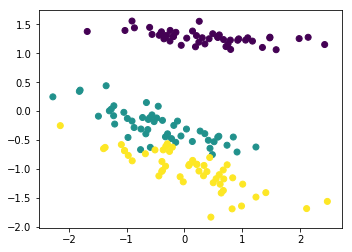

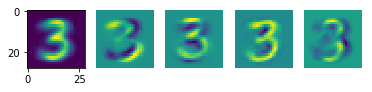

In [2]:
iris=datasets.load_iris()

pca=PCA(n_components=2)
Z=pca.fit_transform(iris.data)
plt.scatter(Z[:,0],Z[:,1],c=iris.target)
plt.gca().set_aspect('equal',adjustable='box')
plt.show()

mnist=datasets.fetch_mldata("MNIST original")
mnist3=mnist.data[np.random.choice(np.where(mnist.target==3)[0],200)]
pca=PCA(n_components=4)
pca.fit(mnist3)
plt.subplot(1,5,1)
plt.imshow(pca.mean.reshape(28,28))
for i,w in enumerate(pca.W.T[::-1]):
    plt.subplot(1,5,i+2)
    plt.imshow(w.reshape(28,28))
    plt.axis('off')
plt.show()


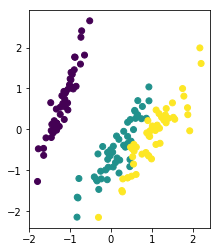

In [3]:
pca=PCA(n_components=2)
Z=pca.fit_transform(iris.data,method="em")
plt.scatter(Z[:,0],Z[:,1],c=iris.target)
plt.gca().set_aspect('equal',adjustable='box')
plt.show()


In [4]:
def create_toy_data(sample_size=100,ndim_hidden=1, ndim_observe=2, std=1.):
    Z=np.random.normal(size=(sample_size,ndim_hidden))
    mu=np.random.uniform(-5,5,size=(ndim_observe))
    W=np.random.uniform(-5,5,(ndim_hidden,ndim_observe))

    X=Z.dot(W)+mu+np.random.normal(scale=std,size=(sample_size, ndim_observe))
    return X


In [5]:
def hinton(matrix,max_weight=None,ax=None):
    ax=ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight=2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal','box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_locator(plt.NullLocator())

    for (x,y),w in np.ndenumerate(matrix):
        color='white' if w>0 else 'black'
        size=np.sqrt(np.abs(w)/max_weight)
        rect=plt.Rectangle([y-size/2,x-size/2],size,size,
                           facecolor=color,edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()
    plt.xlim(-0.5,np.size(matrix,1)-0.5)
    plt.ylim(-0.5,len(matrix)-0.5)


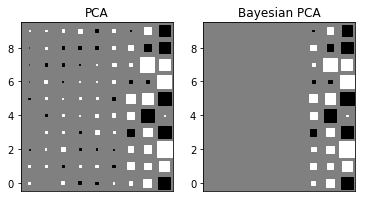

In [8]:

X = create_toy_data(sample_size=100, ndim_hidden=3, ndim_observe=10, std=1.)
pca = PCA(n_components=9)
pca.fit(X)
bpca = BayesianPCA(n_components=9)
bpca.fit(X, initial="eigen")
plt.subplot(1, 2, 1)
plt.title("PCA")
hinton(pca.W)
plt.subplot(1, 2, 2)
plt.title("Bayesian PCA")
hinton(bpca.W)
plt.show()


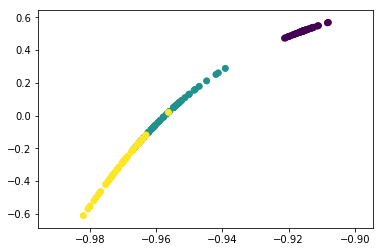

In [9]:

autoencoder = Autoencoder(4, 3, 2)
autoencoder.fit(iris.data, 10000, 1e-3)

Z = autoencoder.transform(iris.data)
plt.scatter(Z[:, 0], Z[:, 1], c=iris.target)
plt.show()